In [1]:
# %cd ../DDI_model/ddi_model/

from data_load import *
from model import DDI_model

Using TensorFlow backend.


In [2]:
import tensorflow as tf
from keras import backend as K

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
session = tf.Session(config=config)
K.set_session(session)

In [3]:
np.random.seed(3)
tf.random.set_random_seed(3)

## DDI model 

In [4]:
ddi_model = DDI_model()

c:\Users\sasin\Desktop\FYP\phase-2\DDI-Prediction\model.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="elu", input_shape=(978,), units=978)`
  shared_layer.add(Dense(output_dim=self.input_drug_dim, activation=self.drug_activation,input_shape=(978,)))
c:\Users\sasin\Desktop\FYP\phase-2\DDI-Prediction\model.py:46: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_regularizer=<keras.reg..., activation="elu", input_shape=(978,), units=100)`
  shared_layer2.add(Dense(output_dim=self.drug_emb_dim, kernel_regularizer=l2(0.001), activation=self.drug_activation,input_shape=(978,)))


### Load data

In [5]:
train_data = load_train_example()
ts_exp = load_exp()

Including reverse pairs:  (38520, 4)


In [6]:
ts_exp

,pubchem,0,1,2,3,4,5,6,7,8,...,968,969,970,971,972,973,974,975,976,977
0,4107,2.023156,-0.637667,0.508418,0.903529,-0.866439,-1.153608,-0.651694,0.290923,-1.329640,...,0.458290,1.730179,2.436490,0.775115,-1.366190,1.036381,-0.422190,-1.244668,-0.739446,1.427519
1,4112,1.602906,1.989409,0.574536,0.841638,-0.151291,-0.006409,-1.177543,0.108901,-1.248328,...,0.243781,0.164179,1.492621,0.532075,-0.731411,1.867515,-0.768676,-0.110849,-0.471595,-0.199671
2,40976,1.895954,0.441047,-0.700006,0.799433,0.545501,1.304197,-2.358831,-0.688144,1.257694,...,-1.377463,1.571880,0.824694,-0.652848,-0.748871,0.864399,0.103032,0.173230,2.516417,-0.074230
3,6447131,0.433131,0.784507,0.243227,-0.197981,0.152966,0.335183,0.116761,-0.984858,-0.753475,...,-0.125810,0.195772,0.669960,-0.577917,-0.065740,0.828880,0.176177,0.566666,1.468457,-0.443092
4,32797,0.746283,0.889106,-0.010947,-0.025273,-0.301981,0.212814,-0.806927,-0.404837,0.290474,...,1.306422,0.491085,0.827774,-0.567214,-0.006600,0.850433,0.287322,0.706342,0.591549,-0.721958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,2022,-0.535473,2.627563,0.877132,2.771075,0.199708,3.022818,-1.361308,-0.698159,-5.497741,...,1.604584,2.081344,2.354659,1.720214,-2.276593,2.567887,2.334205,-1.136895,1.462881,1.668208
641,4075,1.810088,0.249091,-1.155589,1.369188,-3.312798,-2.139150,-2.526536,-4.853147,-0.228336,...,4.090223,3.154195,3.439869,-0.582540,0.166122,1.526028,0.779961,0.475549,-0.296309,1.540952
642,38904,0.555673,0.910823,0.078900,-0.092938,-0.275560,0.679947,-0.573681,-0.122865,0.373012,...,-0.356132,-0.234931,0.212759,-1.142739,0.795973,0.585458,0.100743,0.295634,0.422708,-0.656780
643,4091,1.739901,1.904180,0.078364,1.251029,-1.224811,-1.048293,-0.932539,-0.341421,-1.325957,...,1.126908,0.832467,1.845721,0.352615,-0.526953,1.364348,0.491616,0.124387,-0.524020,0.636648


In [7]:
train_data

,drug1,drug2,SE,label
0,4595,122316,0,0.0
1,3355,60198,0,0.0
2,3899,77993,0,0.0
3,5379,152945,0,0.0
4,2088,3449,0,0.0
...,...,...,...,...
19255,62924,2771,962,1.0
19256,59708,4691,962,1.0
19257,3639,2955,962,1.0
19258,4594,3958,962,1.0


### Load model and Evaluation

In [8]:
len(train_data.iloc[:,:3])
# ts_exp[:1]

38520

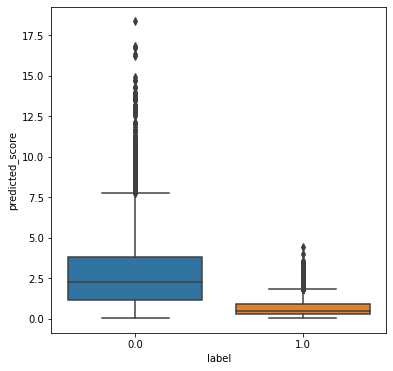

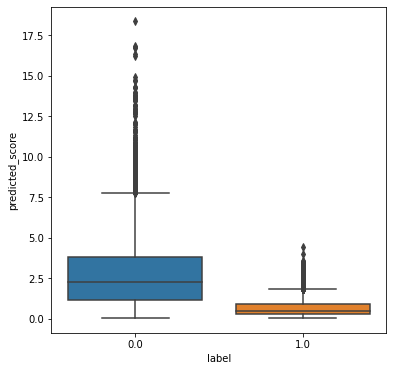

Test set predicted === 


In [9]:
# load pretrained model weights
ddi_model.load_model(model_load_path='trained_model/', model_name='ddi_model_weights.h5', threshold_name='ddi_model_threshold.csv')

# test model evaluation with example data
prediced_label = ddi_model.test(test_x=train_data.iloc[:,:3], test_y=train_data.iloc[:,3], exp_df=ts_exp)

In [10]:
prediced_label.iloc[:,:6]

,drug1,drug2,SE,label,predicted_label_x,predicted_label_y
0,4595,122316,0,0.0,0,0
1,3355,60198,0,0.0,0,0
2,3899,77993,0,0.0,0,0
3,5379,152945,0,0.0,0,0
4,2088,3449,0,0.0,0,0
...,...,...,...,...,...,...
38515,62924,2771,962,1.0,1,1
38516,59708,4691,962,1.0,1,1
38517,3639,2955,962,1.0,1,1
38518,4594,3958,962,1.0,1,1


In [11]:
c=0
for i in range(0,len(prediced_label['final_predicted_label'])):
    if(prediced_label['final_predicted_label'][i]==prediced_label['label'][i]):
        c=c+1
print("Accuracy: ",c/len(prediced_label['final_predicted_label']))

Accuracy:  0.8091381100726895


In [12]:
ind=300
data=pd.DataFrame([train_data.iloc[ind]])
data.iloc[:,:3]

,drug1,drug2,SE
300,2118.0,5466.0,15.0


In [13]:
drug1=int(data['drug1'][ind])
drug2=int(data['drug2'][ind])
side_effect=int(data['SE'][ind])

=====Drug1=====
Chemical Name: 8-chloro-1-methyl-6-phenyl-4H-[1,2,4]triazolo[4,3-a][1,4]benzodiazepine
Brand Names: ['alprazolam', 'Xanax', '28981-97-7', 'Niravam', 'Trankimazin', 'Tranquinal', 'Alplax', 'Constan', 'Frontal', 'Solanax', 'Tafil', 'Xanor', 'Alpronax', 'Intensol', 'Tricalma', 'Xanax XR', 'Alcelam', 'Alpram', 'Alzolam', 'Anpress', 'Bestrol', 'Neurol', 'Prinox', 'Relaxol', 'Restyl', 'Valeans', 'Xanagis', 'Zolarem', 'Zoldac', 'Zotran', 'Alpaz', 'Alzam', 'Panix', 'Apo-Alpraz', 'Alprazolam intensol', 'Alprazolamum', 'Pharnax', 'Prazolan', 'Tensivan', 'Xanolam', 'Zacetin', 'Zanapam', '8-Chloro-1-methyl-6-phenyl-4H-[1,2,4]triazolo[4,3-a][1,4]benzodiazepine', 'Algad', 'Alprax', 'Helex', 'Ksalol', 'Mialin', 'Prazam', 'Unilan', 'Zaxan', 'Zenax', 'Zolam', 'Zoldax', 'Zopax', 'Zopic', 'Gen-Alprazolan', 'TUS-1', 'Tafil D', 'Xanax TS', 'D 65MT', 'Alprazolam civ', 'Tus 1', 'Alprazolamum [INN-Latin]', 'Alprazolam extended release tablets', '8-Chloro-1-methyl-6-phenyl-4H-s-triazolo(4,3-a)(

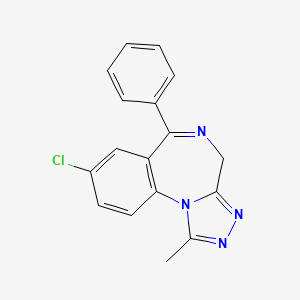

=====Drug2=====
Chemical Name: 1-[4,4-bis(3-methylthiophen-2-yl)but-3-enyl]piperidine-3-carboxylic acid
Brand Names: ['109857-64-9', '1-[4,4-bis(3-methylthiophen-2-yl)but-3-en-1-yl]piperidine-3-carboxylic acid', '1-[4,4-bis(3-methylthiophen-2-yl)but-3-enyl]piperidine-3-carboxylic acid', 'SCHEMBL342814', 'CERAPP_25108', 'CHEMBL1190260', 'DTXSID50861229', 'DTXSID60274467', '(-)-(R)-1-[4,4-Bis(3-methyl-2-thienyl)-3butenyl]nipecotic acid hydrochloride', '(R)-1-(4,4-Bis(3-methylthiophen-2-yl)but-3-en-1-yl)piperidine-3-carboxylic acid', 'BCP09228', 'DS-021234', 'NS00096730', 'EN300-297456', 'A893940']
Visualization of Drug structure:


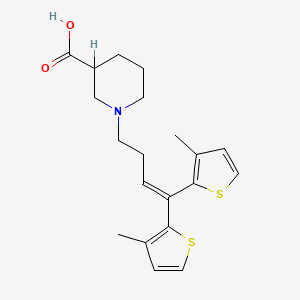

In [14]:
import urllib.request
from IPython.display import Image, display

def get_2d_image_url(cid):
    base_url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{}/PNG"
    url = base_url.format(cid)
    return url

def display_2d_image(cid):
    image_url = get_2d_image_url(cid)
    image = Image(urllib.request.urlopen(image_url).read())
    display(image)

def get_chemical_name(cid):
    url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{}/property/IUPACName/txt".format(cid)
    response = urllib.request.urlopen(url)
    chemical_name = response.read().decode("utf-8").strip()
    return chemical_name

def get_synonyms(cid):
    url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{}/synonyms/TXT".format(cid)
    response = urllib.request.urlopen(url)
    synonyms = response.read().decode("utf-8").strip().split("\n")
    return synonyms

# Example usage
print("=====Drug1=====")
cid =  drug1  # Example CID
chemical_name = get_chemical_name(cid)
print("Chemical Name:", chemical_name)
synonyms = get_synonyms(cid)
print("Brand Names:", synonyms)
print("Visualization of Drug structure:")
display_2d_image(cid)



print("=====Drug2=====")
cid =  drug2  # Example CID
chemical_name = get_chemical_name(cid)
print("Chemical Name:", chemical_name)
synonyms = get_synonyms(cid)
print("Brand Names:", synonyms)
print("Visualization of Drug structure:")
display_2d_image(cid)

In [15]:
se=pd.read_csv("data/twosides_side_effect_info.csv")
for i in se['SE_map']:
    if(i==side_effect):
        print("Side Effect Name: ",se['Side Effect Name'][i])
        break

Side Effect Name:  Alcoholic intoxication


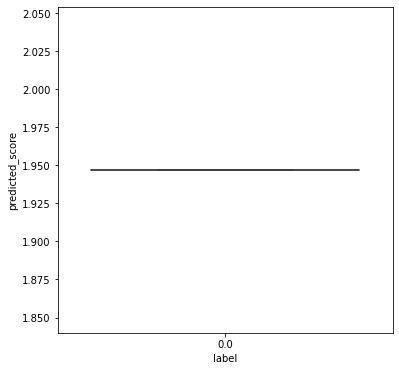

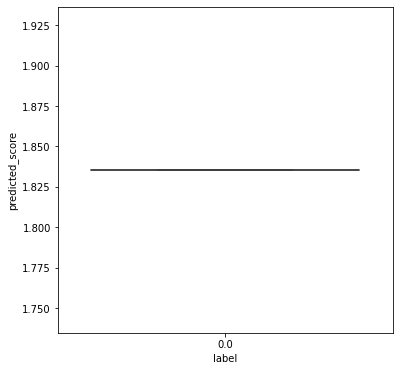

Test set predicted === 


,drug1,drug2,SE,label,predicted_label_x,predicted_label_y
0,2118.0,5466.0,15.0,0.0,0,0


In [16]:
prediced_label = ddi_model.test(test_x=data.iloc[:,:3], test_y=data.iloc[:,3], exp_df=ts_exp)
prediced_label.iloc[:,:6]

In [17]:
prediced_label.iloc[:,9]

0    0
Name: final_predicted_label, dtype: int64